In [119]:
import numpy as np
import shutil
import os, random
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import gender_guesser.detector as gender_detector

In [120]:
%matplotlib inline

In [172]:
LIKE_PATH = os.path.join('data', 'likes')
DISLIKE_PATH = os.path.join('data', 'dislikes')
LFW_DIR = 'lfw'
d = gender_detector.Detector()

In [10]:
from sklearn.datasets import fetch_lfw_pairsd

In [12]:
lfw = fetch_lfw_pairs(subset = 'test', color = True, resize=1)

In [162]:
# Save user in like or dislike folder
def save_user_swipe(username, gender, directory_path):
    swipe = None
    file_path = random.choice(os.listdir(directory_path))
    img = Image.open(os.path.join(directory_path, file_path))
    imgplot = plt.imshow(img)
    title = '{username} / {gender}'.format(username = username, gender = gender)
    plt.title(title)
    plt.show()
    while swipe != 'l' and swipe != 'd':
        swipe = input("What do you think of this person?")
        if swipe == 'l':
            shutil.copytree(directory_path, LIKE_PATH, dirs_exist_ok=True)
            print(username, 'saved on like')
        elif swipe == 'd':
            shutil.copytree(directory_path, DISLIKE_PATH, dirs_exist_ok=True)
            print(username, 'saved on dislike')
        elif swipe == 'end':
            print('------------ENDING----------')
            break
        else:
            print('Invalid input - type l for like and d for dislike')
    return swipe

In [184]:
# Get total of males / females / undeterminate users and pictures in directory
def directory_gender_info(directory_path):
    d = gender_detector.Detector()
    male = 0
    male_pictures = 0
    female = 0
    female_pictures = 0
    undeterminate = 0
    undeterminate_pictures = 0
    for directory in os.listdir(directory_path):
        if directory == '.DS_Store':
            continue
        username = directory.replace('_', ' ')
        gender = d.get_gender(username.split()[0])
        if os.path.isdir(os.path.join(directory_path, directory)):
            _, _, files = next(os.walk(os.path.join(directory_path, directory)))
            file_count = len(files)
        else:
            file_count = 1
        if gender == 'female' or gender == 'mostly_female':
            female +=1
            female_pictures += file_count
        elif gender == 'male' or gender == 'mostly_male':
            male +=1
            male_pictures += file_count
        elif gender == 'unknown' or gender == 'andy':
            undeterminate +=1
            undeterminate_pictures += file_count
        else:
            print('gender fail', gender)
    # Print info of directory
    print('Printing information of', directory_path,
      '\n\nfemales =', female, 'female pictures =', female_pictures,
      '\nmale =', male, 'male pictures =', male_pictures,
      '\nundeterminate =', undeterminate, 'undeterminate pictures =', undeterminate_pictures,
      '\ntotal people =',
      female + male + undeterminate,
      'total pictures', 
      female_pictures + male_pictures + undeterminate_pictures
     )

In [164]:
def clean_directory(directory_path):
    for file_name in os.listdir(directory_path):
        # construct full file path
        file = os.path.join(directory_path, file_name)
        if os.path.isfile(file):
            print('Deleting file:', file)
            os.remove(file)

In [175]:
clean_directory(DISLIKE_PATH)

Deleting file: data/dislikes/Kevin_Gil_0001.jpg
Deleting file: data/dislikes/Gerry_Kelly_0001.jpg
Deleting file: data/dislikes/Eliane_Karp_0003.jpg
Deleting file: data/dislikes/Vojislav_Kostunica_0006.jpg
Deleting file: data/dislikes/Phil_Johnson_0001.jpg
Deleting file: data/dislikes/Arnold_Schwarzenegger_0025.jpg
Deleting file: data/dislikes/Tom_Hanks_0009.jpg
Deleting file: data/dislikes/Arnold_Schwarzenegger_0031.jpg
Deleting file: data/dislikes/Sean_Penn_0002.jpg
Deleting file: data/dislikes/Jamie_Carey_0001.jpg
Deleting file: data/dislikes/Tyler_Grillo_0001.jpg
Deleting file: data/dislikes/William_Nessen_0001.jpg
Deleting file: data/dislikes/Rudolph_Giuliani_0021.jpg
Deleting file: data/dislikes/Scott_Sullivan_0002.jpg
Deleting file: data/dislikes/Michel_Therrien_0001.jpg
Deleting file: data/dislikes/Hugh_Carey_0001.jpg
Deleting file: data/dislikes/Priscilla_Owen_0002.jpg
Deleting file: data/dislikes/Jose_Sarney_0003.jpg
Deleting file: data/dislikes/Robert_Mueller_0002.jpg
Deletin

Deleting file: data/dislikes/John_Stockton_0005.jpg
Deleting file: data/dislikes/John_Eastman_0001.jpg
Deleting file: data/dislikes/Ray_Romano_0003.jpg
Deleting file: data/dislikes/George_W_Bush_0427.jpg
Deleting file: data/dislikes/Donald_Rumsfeld_0010.jpg
Deleting file: data/dislikes/Marieta_Chrousala_0003.jpg
Deleting file: data/dislikes/George_W_Bush_0433.jpg
Deleting file: data/dislikes/Donald_Rumsfeld_0004.jpg
Deleting file: data/dislikes/Prem_Kumar_Nair_0001.jpg
Deleting file: data/dislikes/Stefan_Tafrov_0001.jpg
Deleting file: data/dislikes/Jose_Maria_Aznar_0008.jpg
Deleting file: data/dislikes/Bill_Butler_0001.jpg
Deleting file: data/dislikes/David_Beckham_0013.jpg
Deleting file: data/dislikes/Zafarullah_Khan_Jamali_0002.jpg
Deleting file: data/dislikes/Ariel_Sharon_0041.jpg
Deleting file: data/dislikes/Mark_Andrew_0001.jpg
Deleting file: data/dislikes/Reggie_Miller_0001.jpg
Deleting file: data/dislikes/Adam_Ant_0001.jpg
Deleting file: data/dislikes/Tom_DeLay_0001.jpg
Deleting

Deleting file: data/dislikes/Luis_Horna_0002.jpg
Deleting file: data/dislikes/Michael_Chang_0005.jpg
Deleting file: data/dislikes/Asif_Ali_Zardari_0001.jpg
Deleting file: data/dislikes/Leon_Lai_0001.jpg
Deleting file: data/dislikes/Herman_Moore_0001.jpg
Deleting file: data/dislikes/Mohammad_Khatami_0010.jpg
Deleting file: data/dislikes/Edmund_Stoiber_0002.jpg
Deleting file: data/dislikes/Peter_Arnett_0002.jpg
Deleting file: data/dislikes/Fidel_Castro_0012.jpg
Deleting file: data/dislikes/Mary_Jo_Myers_0001.jpg
Deleting file: data/dislikes/Jacques_Chirac_0026.jpg
Deleting file: data/dislikes/Joseph_Deiss_0001.jpg
Deleting file: data/dislikes/Jesse_Ventura_0003.jpg
Deleting file: data/dislikes/Meirion_Evans_0001.jpg
Deleting file: data/dislikes/Carlos_Salinas_0001.jpg
Deleting file: data/dislikes/Federico_Trillo_0003.jpg
Deleting file: data/dislikes/Zakia_Hakki_0001.jpg
Deleting file: data/dislikes/Gregg_Popovich_0002.jpg
Deleting file: data/dislikes/Fidel_Castro_0006.jpg
Deleting file: 

Deleting file: data/dislikes/Lance_Armstrong_0009.jpg
Deleting file: data/dislikes/Arye_Mekel_0001.jpg
Deleting file: data/dislikes/Jimmy_Carter_0007.jpg
Deleting file: data/dislikes/Tony_Blair_0123.jpg
Deleting file: data/dislikes/Joseph_LePore_0001.jpg
Deleting file: data/dislikes/Ray_Morrough_0001.jpg
Deleting file: data/dislikes/Nestor_Kirchner_0015.jpg
Deleting file: data/dislikes/Claudia_Pechstein_0003.jpg
Deleting file: data/dislikes/Martin_McGuinness_0002.jpg
Deleting file: data/dislikes/Geraldine_Chaplin_0001.jpg
Deleting file: data/dislikes/Jan-Michael_Gambill_0002.jpg
Deleting file: data/dislikes/Donald_Rumsfeld_0108.jpg
Deleting file: data/dislikes/Glenn_Rivers_0001.jpg
Deleting file: data/dislikes/Julianne_Moore_0014.jpg
Deleting file: data/dislikes/Lance_Bass_0002.jpg
Deleting file: data/dislikes/Nestor_Kirchner_0001.jpg
Deleting file: data/dislikes/Dennis_Hastert_0006.jpg
Deleting file: data/dislikes/Hugh_Grant_0007.jpg
Deleting file: data/dislikes/Tony_Blair_0137.jpg
De

Deleting file: data/dislikes/Jeong_Se-hyun_0001.jpg
Deleting file: data/dislikes/Gong_Li_0001.jpg
Deleting file: data/dislikes/Jose_Manuel_Durao_Barroso_0002.jpg
Deleting file: data/dislikes/Gerhard_Schroeder_0089.jpg
Deleting file: data/dislikes/John_Bolton_0017.jpg
Deleting file: data/dislikes/Queen_Elizabeth_II_0013.jpg
Deleting file: data/dislikes/Ally_Sheedy_0001.jpg
Deleting file: data/dislikes/Colin_Jackson_0002.jpg
Deleting file: data/dislikes/Roy_Moore_0004.jpg
Deleting file: data/dislikes/Martina_McBride_0002.jpg
Deleting file: data/dislikes/Madeleine_Albright_0001.jpg
Deleting file: data/dislikes/Hans_Blix_0013.jpg
Deleting file: data/dislikes/Leszek_Miller_0002.jpg
Deleting file: data/dislikes/Colin_Powell_0162.jpg
Deleting file: data/dislikes/Wen_Jiabao_0012.jpg
Deleting file: data/dislikes/Eva_Amurri_0001.jpg
Deleting file: data/dislikes/Donald_Pettit_0001.jpg
Deleting file: data/dislikes/Mohammed_Baqir_al-Hakim_0001.jpg
Deleting file: data/dislikes/Dai_Bachtiar_0002.jpg


In [185]:
directory_gender_info(LIKE_PATH)

Printing information of data/likes 

females = 2818 female pictures = 2818 
male = 0 male pictures = 0 
undeterminate = 0 undeterminate pictures = 0 
total people = 2818 total pictures 2818


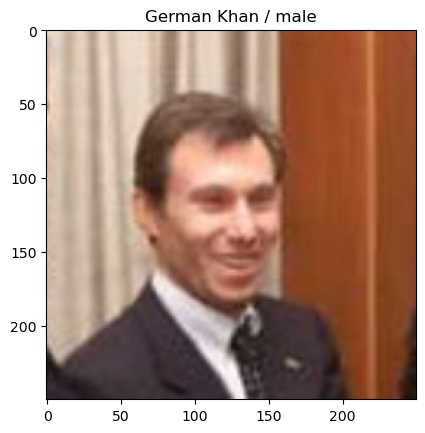

What do you think of this person?l
German Khan saved on like


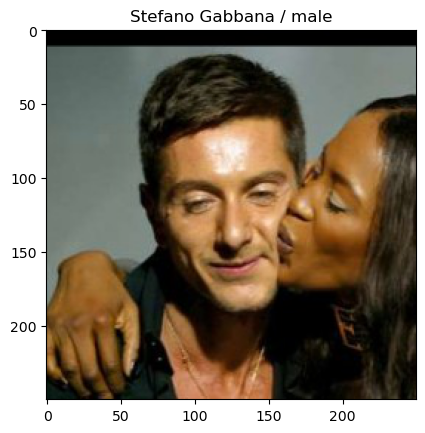

What do you think of this person?d
Stefano Gabbana saved on dislike


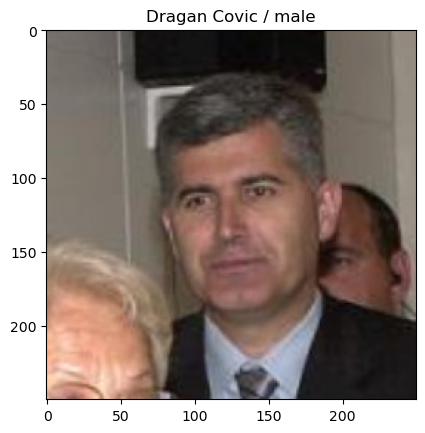

What do you think of this person?d
Dragan Covic saved on dislike


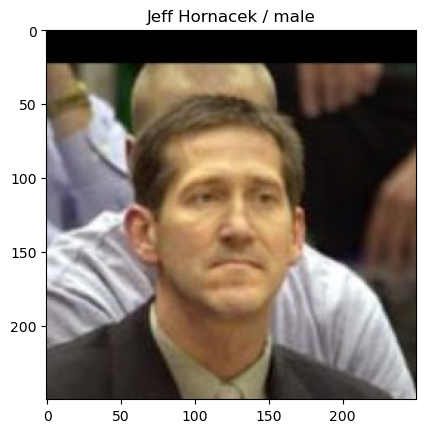

What do you think of this person?d
Jeff Hornacek saved on dislike


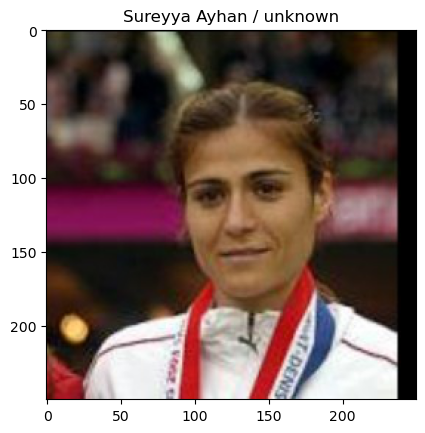

What do you think of this person?d
Sureyya Ayhan saved on dislike


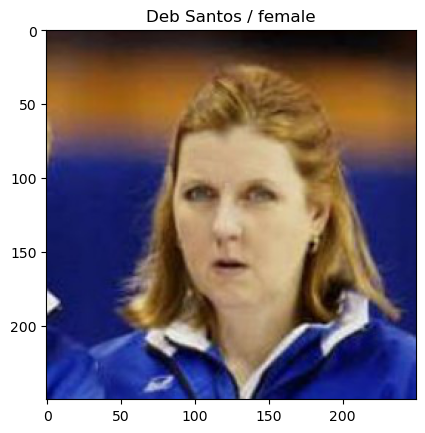

What do you think of this person?l
Deb Santos saved on like


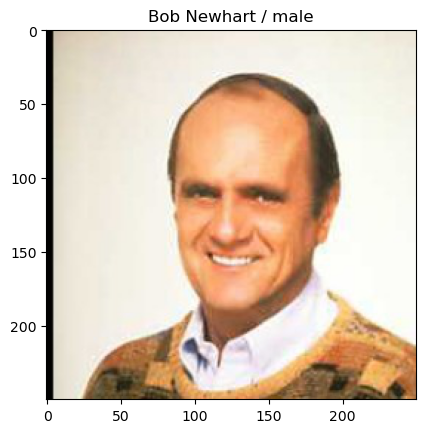

What do you think of this person?l
Bob Newhart saved on like


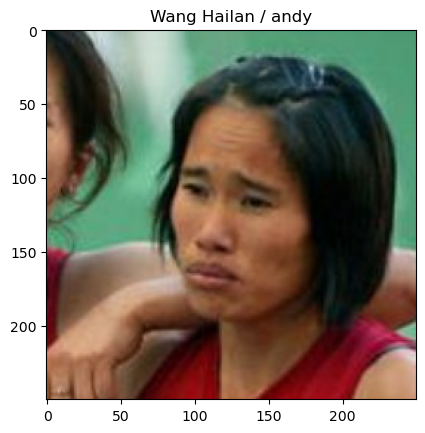

What do you think of this person?l
Wang Hailan saved on like


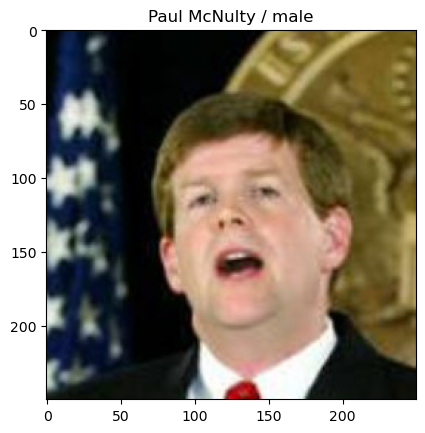

What do you think of this person?d
Paul McNulty saved on dislike


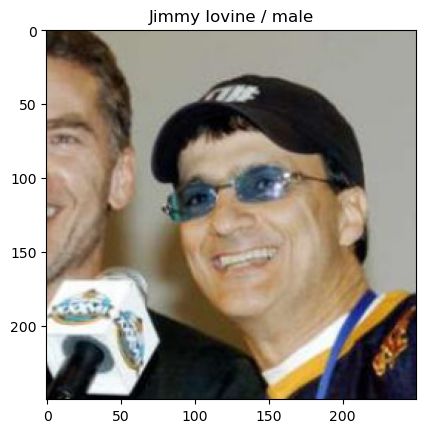

What do you think of this person?d
Jimmy Iovine saved on dislike


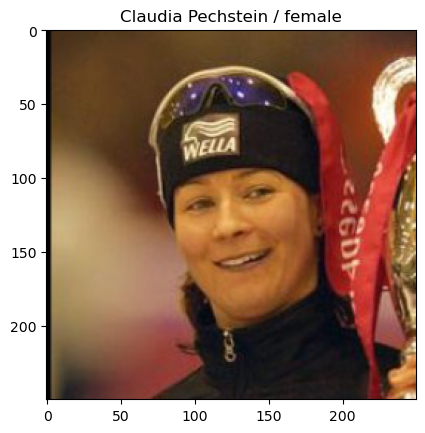

What do you think of this person?l
Claudia Pechstein saved on like


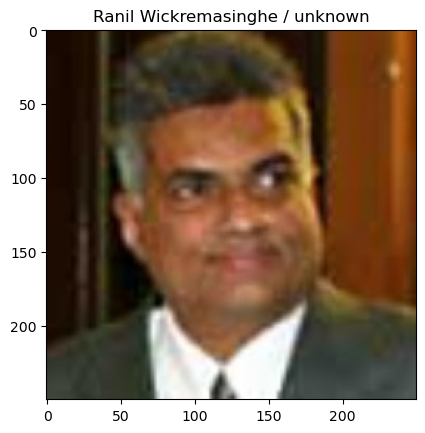

What do you think of this person?d
Ranil Wickremasinghe saved on dislike


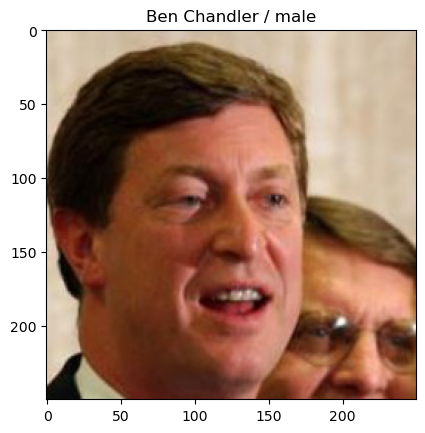

What do you think of this person?d
Ben Chandler saved on dislike


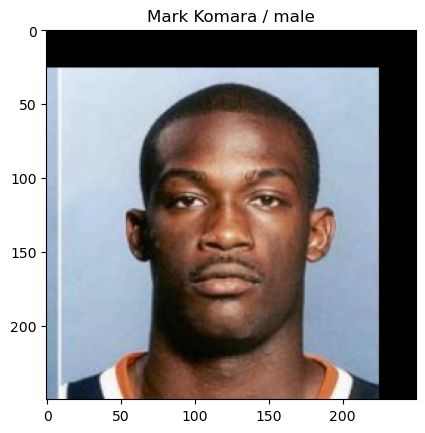

What do you think of this person?d
Mark Komara saved on dislike


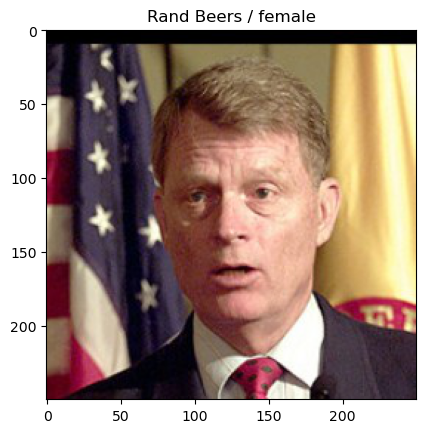

What do you think of this person?d
Rand Beers saved on dislike


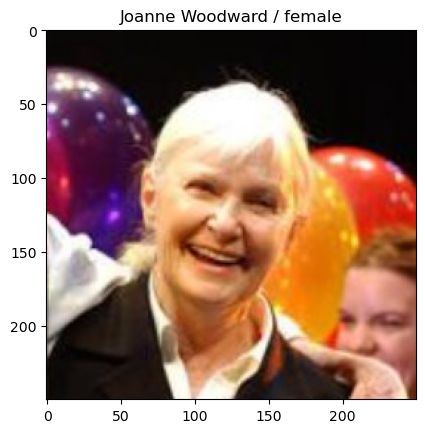

What do you think of this person?d
Joanne Woodward saved on dislike


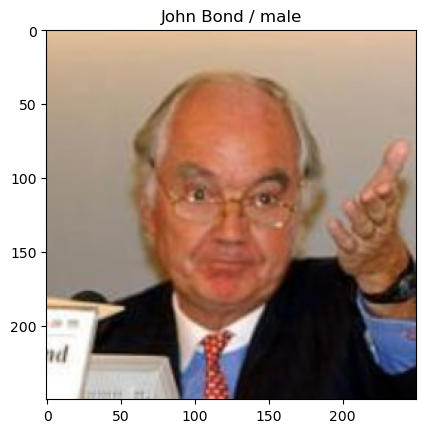

What do you think of this person?d
John Bond saved on dislike


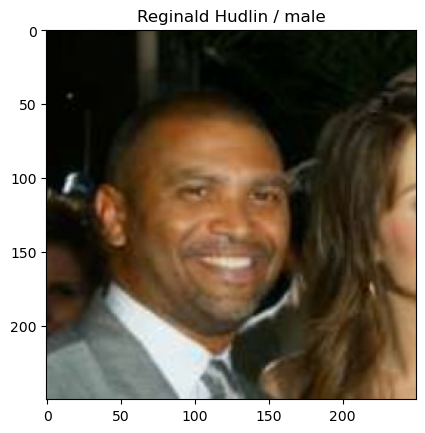

What do you think of this person?d
Reginald Hudlin saved on dislike


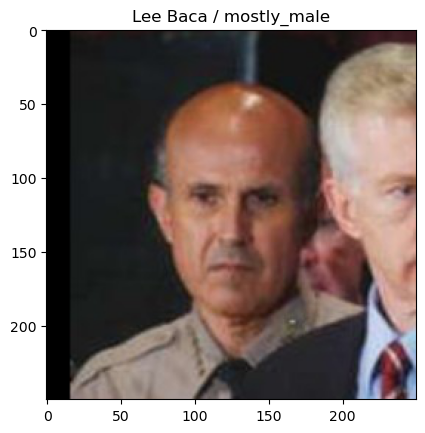

What do you think of this person?d
Lee Baca saved on dislike


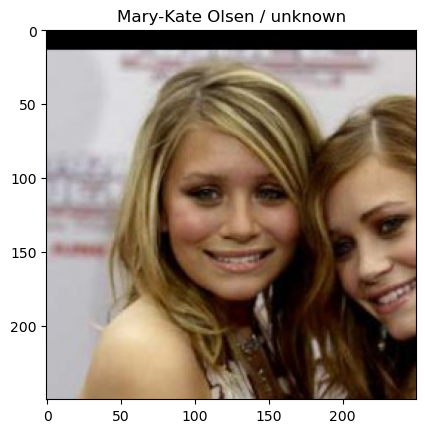

What do you think of this person?l
Mary-Kate Olsen saved on like


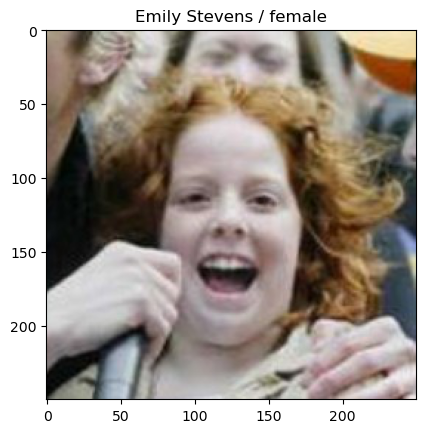

What do you think of this person?d
Emily Stevens saved on dislike


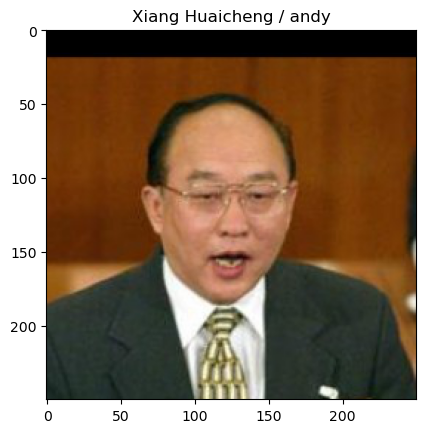

What do you think of this person?d
Xiang Huaicheng saved on dislike


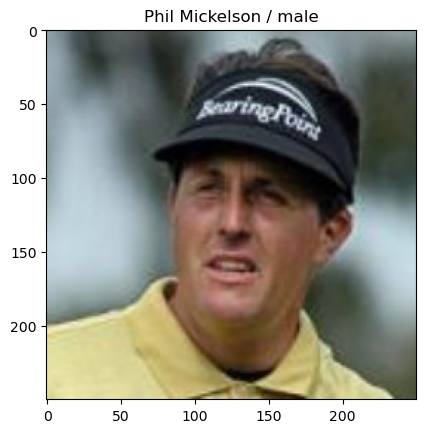

What do you think of this person?d
Phil Mickelson saved on dislike


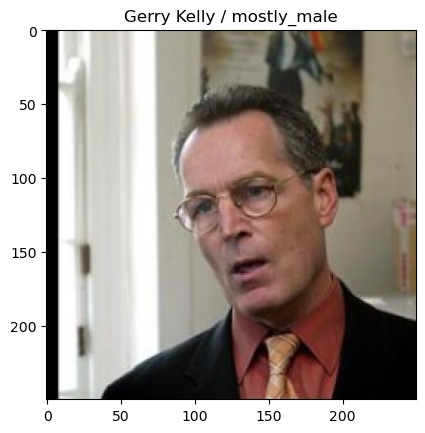

What do you think of this person?d
Gerry Kelly saved on dislike


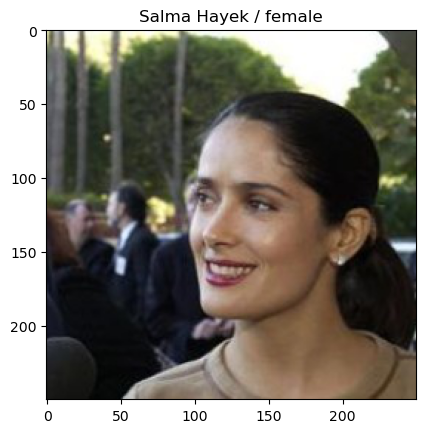

What do you think of this person?l
Salma Hayek saved on like


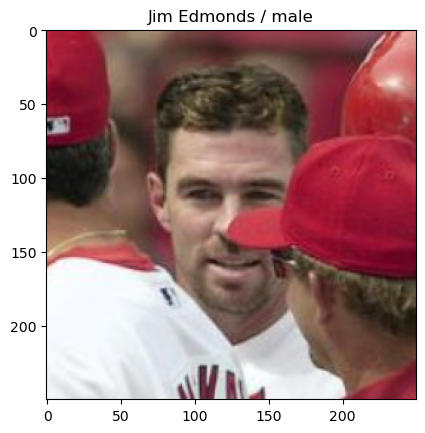

What do you think of this person?end
------------ENDING----------


In [168]:
for directory in os.listdir(LFW_DIR):
    if directory == '.DS_Store':
        continue
    username = directory.replace('_', ' ')
    gender = d.get_gender(username.split()[0])
    answer = save_user_swipe(username, gender, os.path.join(LFW_DIR, directory))
    if answer == 'end':
        break

In [176]:
# Test all women
for directory in os.listdir(LFW_DIR):
    if directory == '.DS_Store':
        continue
    username = directory.replace('_', ' ')
    gender = d.get_gender(username.split()[0])
    if gender == 'female' or gender == 'mostly_female':
        shutil.copytree(os.path.join(LFW_DIR, directory), LIKE_PATH, dirs_exist_ok=True)
    else:
        shutil.copytree(os.path.join(LFW_DIR, directory), DISLIKE_PATH, dirs_exist_ok=True)
        